In [1]:
#Importing the dependencies

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objects as go
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve
import pickle
from joblib import dump
%matplotlib inline

In [2]:
#Importing the data and looking at the first five rows

df=pd.read_csv("Training Data.csv")
df.head()

Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0                 13          0  
1                 13          0  
2                 10          0  
3                 12          1  
4                 14          1

In [3]:
#Looking at the data types and whether there is a missing data in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [4]:
#Dropping "id" columns since it has no meaning in analyses and modelling, then looking at the shape of the dataframe

df.drop('Id',axis=1,inplace=True)
df.shape

(252000, 12)

In [5]:
df

Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0       1303834   23           3         single          rented            no   
1       7574516   40          10         single          rented            no   
2       3991815   66           4        married          rented            no   
3       6256451   41           2         single          rented           yes   
4       5768871   47          11         single          rented            no   
...         ...  ...         ...            ...             ...           ...   
251995  8154883   43          13         single          rented            no   
251996  2843572   26          10         single          rented            no   
251997  4522448   46           7         single          rented            no   
251998  6507128   45           0         single          rented            no   
251999  9070230   70          17         single          rented            no   

                 Profession                 CITY           STATE  \
0       Mechanical_engineer                 Rewa  Madhya_Pradesh   
1        Software_Developer             Parbhani     Maharashtra   
2          Technical_writer            Alappuzha          Kerala   
3        Software_Developer          Bhubaneswar          Odisha   
4             Civil_servant  Tiruchirappalli[10]      Tamil_Nadu   
...                     ...                  ...             ...   
251995              Surgeon              Kolkata     West_Bengal   
251996         Army_officer                 Rewa  Madhya_Pradesh   
251997      Design_Engineer      Kalyan-Dombivli     Maharashtra   
251998     Graphic_Designer          Pondicherry      Puducherry   
251999         Statistician                Avadi      Tamil_Nadu   

        CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
0                     3                 13          0  
1                     9                 13          0  
2                     4                 10          0  
3                     2                 12          1  
4                     3                 14          1  
...                 ...                ...        ...  
251995                6                 11          0  
251996                6                 11          0  
251997                7                 12          0  
251998                0                 10          0  
251999                7                 11          0  

[252000 rows x 12 columns]

In [6]:
# Unifying "Uttar Pradesh" in the dataset

df["STATE"]=df["STATE"].replace({"Uttar_Pradesh[5]":"Uttar_Pradesh"})
df

Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0       1303834   23           3         single          rented            no   
1       7574516   40          10         single          rented            no   
2       3991815   66           4        married          rented            no   
3       6256451   41           2         single          rented           yes   
4       5768871   47          11         single          rented            no   
...         ...  ...         ...            ...             ...           ...   
251995  8154883   43          13         single          rented            no   
251996  2843572   26          10         single          rented            no   
251997  4522448   46           7         single          rented            no   
251998  6507128   45           0         single          rented            no   
251999  9070230   70          17         single          rented            no   

                 Profession                 CITY           STATE  \
0       Mechanical_engineer                 Rewa  Madhya_Pradesh   
1        Software_Developer             Parbhani     Maharashtra   
2          Technical_writer            Alappuzha          Kerala   
3        Software_Developer          Bhubaneswar          Odisha   
4             Civil_servant  Tiruchirappalli[10]      Tamil_Nadu   
...                     ...                  ...             ...   
251995              Surgeon              Kolkata     West_Bengal   
251996         Army_officer                 Rewa  Madhya_Pradesh   
251997      Design_Engineer      Kalyan-Dombivli     Maharashtra   
251998     Graphic_Designer          Pondicherry      Puducherry   
251999         Statistician                Avadi      Tamil_Nadu   

        CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
0                     3                 13          0  
1                     9                 13          0  
2                     4                 10          0  
3                     2                 12          1  
4                     3                 14          1  
...                 ...                ...        ...  
251995                6                 11          0  
251996                6                 11          0  
251997                7                 12          0  
251998                0                 10          0  
251999                7                 11          0  

[252000 rows x 12 columns]

# Data Analysis

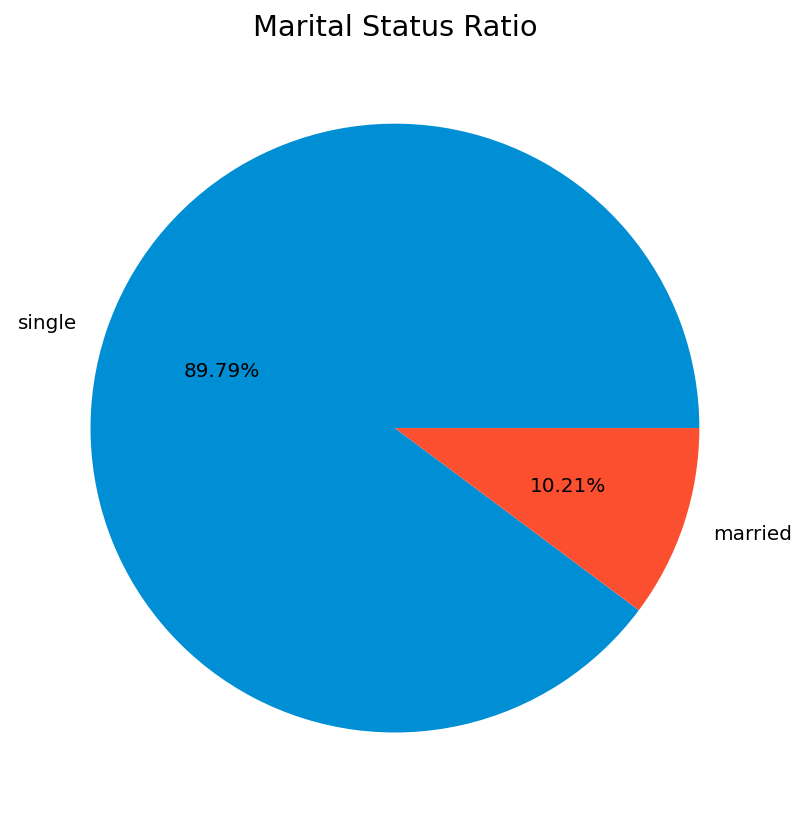

single     226272
married     25728
Name: Married/Single, dtype: int64

In [7]:
#Plotting Married/Single distributions with a pie chart

%config InlineBackend.figure_format='retina'
plt.figure(figsize=(7,7))
df['Married/Single'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.title("Marital Status Ratio")
plt.ylabel("")
plt.show()
df['Married/Single'].value_counts()

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

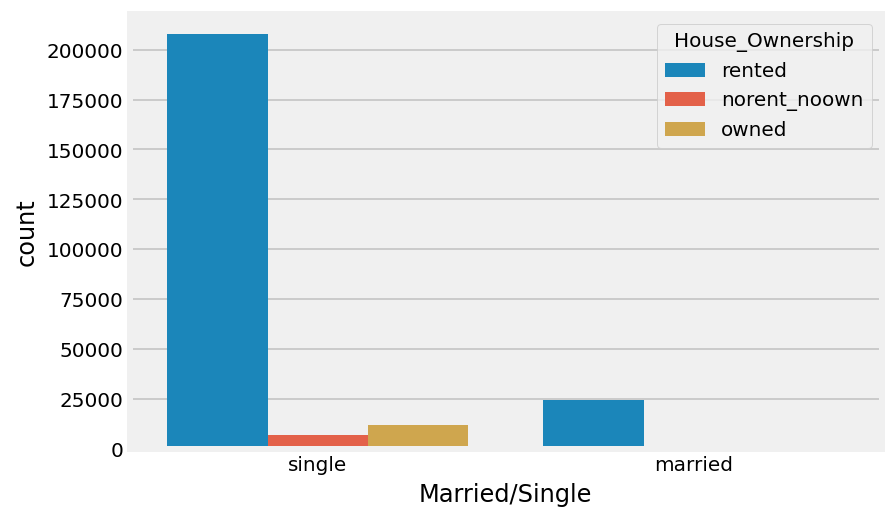

In [8]:
#Plotting Married/Single counts according to house ownership status with a count plot

sns.countplot(x="Married/Single", hue="House_Ownership", data=df)

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

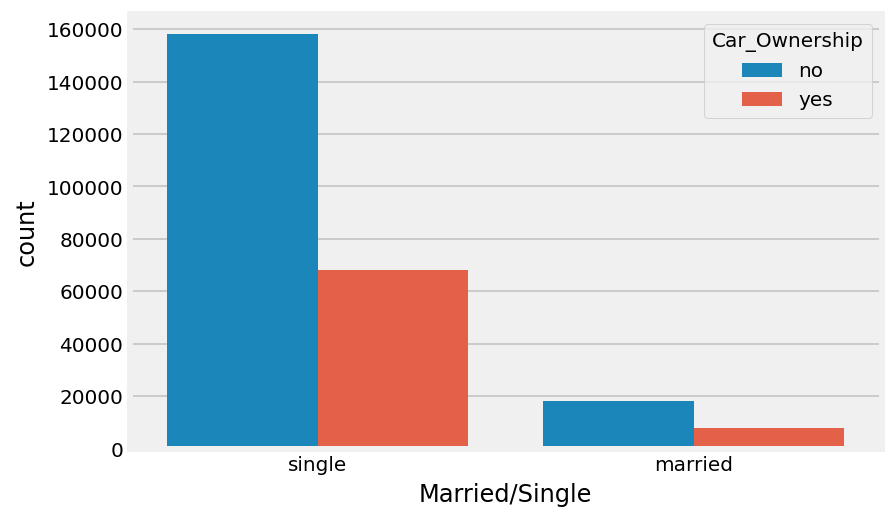

In [9]:
#Plotting Married/Single counts according to car ownership status with a count plot

sns.countplot(x="Married/Single", hue="Car_Ownership", data=df)

<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

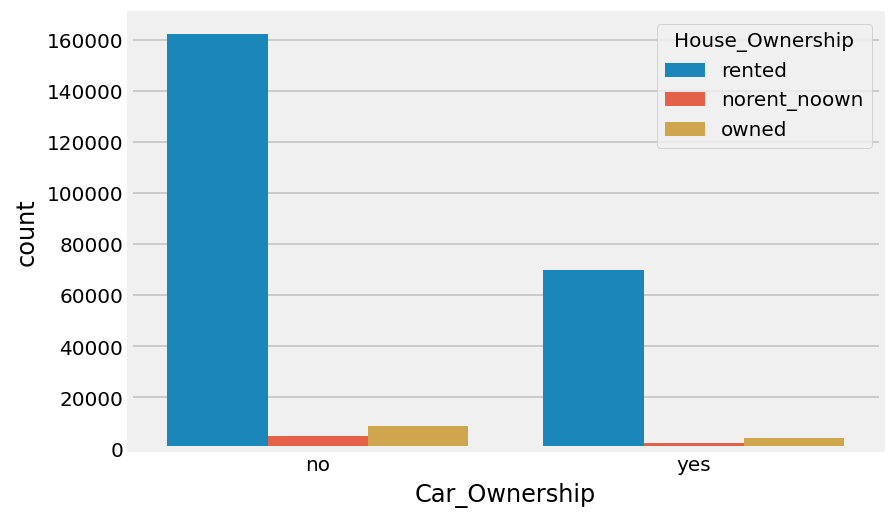

In [10]:
#Plotting House Ownership counts according to car ownership status with a count plot

sns.countplot(x="Car_Ownership", hue="House_Ownership", data=df)

In [11]:
#Creating a new dataframe for visualization professions according to their default risk percentages and average incomes

income=df.pivot_table(index="Profession",values="Income",aggfunc='mean')
prof_count=pd.DataFrame(df["Profession"].value_counts()).reset_index().rename(columns={"Profession":"Profession Count","index":"Profession"})
risk_sum=df.pivot_table(index="Profession",values="Risk_Flag",aggfunc='sum')
risk_count=df.pivot_table(index="Profession",values="Risk_Flag",aggfunc='count')

dff=income.merge(prof_count, on="Profession")
dff=dff.merge(risk_sum, on="Profession")
dff=dff.merge(risk_count, on="Profession")
dff["Default Percentage"]=dff["Risk_Flag_x"]/dff["Risk_Flag_y"]
dff.drop(columns=["Risk_Flag_x","Risk_Flag_y"],inplace=True)
dff.rename(columns={"Income":"Income Average","Profession Count":"Count of Profession"},inplace=True)
dff.head()

Profession  Income Average  Count of Profession  \
0  Air_traffic_controller    4.958422e+06                 5281   
1                 Analyst    4.894181e+06                 4668   
2               Architect    5.004079e+06                 4657   
3            Army_officer    5.094473e+06                 4661   
4                  Artist    5.164765e+06                 4861   

   Default Percentage  
0            0.135391  
1            0.121465  
2            0.131200  
3            0.152113  
4            0.122609

In [12]:
#Looking at the descriptive statistics of this new data

dff.describe()

Income Average  Count of Profession  Default Percentage
count    5.100000e+01            51.000000           51.000000
mean     4.996642e+06          4941.176471            0.123207
std      1.877382e+05           374.277154            0.016496
min      4.502916e+06          4048.000000            0.081486
25%      4.893638e+06          4670.000000            0.112735
50%      4.996878e+06          4881.000000            0.121892
75%      5.112451e+06          5200.000000            0.134549
max      5.443310e+06          5957.000000            0.164052

In [13]:
#Sorting top 10 and bottom 10 values and saving them to different dataframes

dff_top=dff.sort_values(by=['Default Percentage'])[:10]
dff_bot=dff.sort_values(by=['Default Percentage'])[-10:]


In [14]:
#Creating a scatter diagram to indicate the highest default risk levels of professions and their incomes

fig = px.scatter(dff_top, x="Default Percentage", y="Income Average", size="Count of Profession", color="Profession",
          log_x=True)
fig.update_layout(width=int(600),height=400)
fig.show()

In [15]:
#Creating a scatter diagram to indicate the lowest default risk levels of professions and their incomes

fig = px.scatter(dff_bot, x="Default Percentage", y="Income Average", size="Count of Profession", color="Profession",
          log_x=True)
fig.update_layout(width=int(600),height=400)
fig.show()

<AxesSubplot:xlabel='Default Percentage', ylabel='Count'>

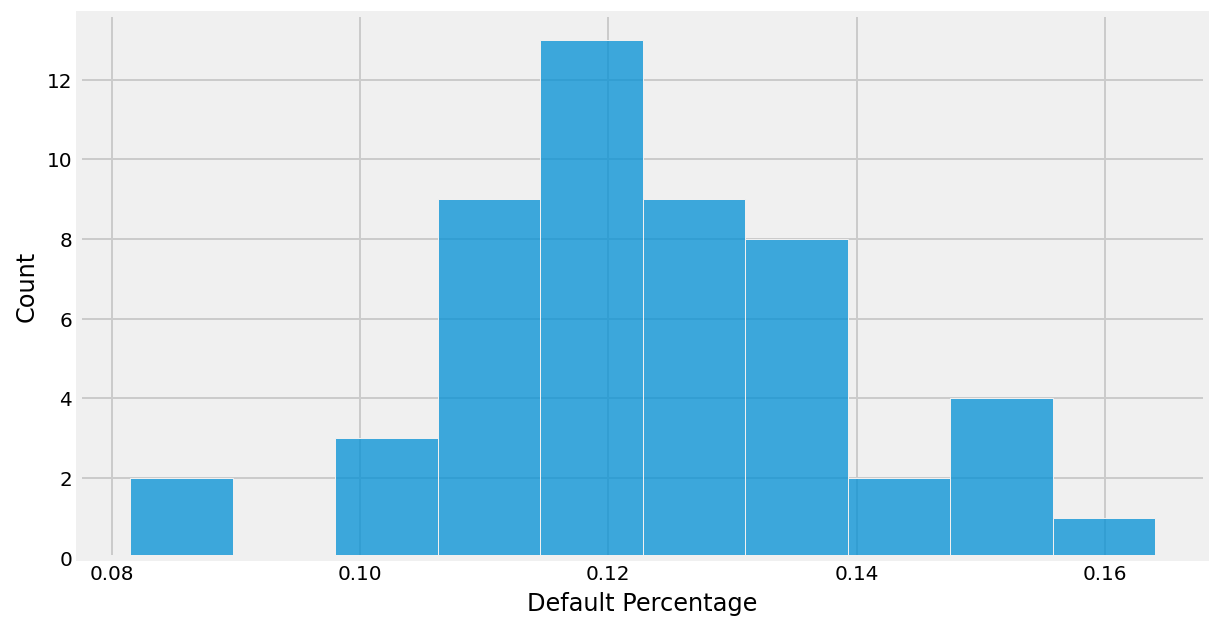

In [16]:
#Creating a histogram to show the income distributions

plt.figure(figsize=(9,5))
sns.histplot(dff['Default Percentage'], bins=10)

In [17]:
#Plotting risk percentages by states

df_state = df.groupby('STATE')['Risk_Flag'].mean().sort_values(ascending = False).reset_index()
df_state['Risk_Flag'] = round(df_state['Risk_Flag']*100, 2)

df_state_plot = pd.concat([df_state[:5],df_state[-5:]]).reset_index(drop = True)

colors = px.colors.sequential.RdBu[:len(df_state_plot)]
fig = go.Figure()

fig.add_trace(go.Bar(
    x = df_state_plot.STATE,
    y = df_state_plot.Risk_Flag,
    text = df_state_plot.Risk_Flag,
    texttemplate = "%{text}%",
  marker_color = colors))

fig.update_layout(
    {
        "title": {
            "text": "<b>Risk Percentage by STATE</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "STATE",
            "tickfont": {
                "size": 10                
            }
        },
        "yaxis": {
            "title": "Risk Percentage",
            "tickfont": {
                "size": 10                
            }
        },
        "template":'plotly_white'
    }
)
fig.update_layout(width=int(800),height=500)
fig.show()

In [18]:
state_risk=df.groupby('STATE')['Risk_Flag'].mean().sort_values(ascending = False).reset_index()
state_count=pd.DataFrame(df["STATE"].value_counts()).reset_index().rename(columns={"STATE":"State Count","index":"STATE"})
state_merged=state_risk.merge(state_count,on="STATE")
state_merged["Risk/Count"]=state_merged["Risk_Flag"]/state_merged["State Count"]*10000
state_merged=state_merged.sort_values(by="Risk/Count",ascending=False)
state_merged

STATE  Risk_Flag  State Count  Risk/Count
0             Manipur   0.215548          849    2.538842
1             Tripura   0.168109          809    2.077982
9    Himachal_Pradesh   0.133253          833    1.599679
24         Chandigarh   0.092988          656    1.417497
20            Mizoram   0.110718          849    1.304105
3   Jammu_and_Kashmir   0.158989         1780    0.893195
17         Puducherry   0.116539         1433    0.813250
27             Sikkim   0.046053          608    0.757445
26        Uttarakhand   0.070971         1874    0.378715
8        Chhattisgarh   0.133281         3834    0.347630
5              Odisha   0.142550         4658    0.306034
2              Kerala   0.167097         5805    0.287851
25             Punjab   0.090042         4720    0.190768
21              Delhi   0.104554         5490    0.190444
10              Assam   0.131691         7062    0.186478
12          Telangana   0.130117         7524    0.172936
14            Haryana   0.124208         7890    0.157424
6           Rajasthan   0.140833         9174    0.153513
7           Jharkhand   0.133296         8965    0.148685
4      Madhya_Pradesh   0.154369        14122    0.109311
16            Gujarat   0.117724        11408    0.103195
23          Karnataka   0.100295        11855    0.084602
11              Bihar   0.130586        19780    0.066019
22         Tamil_Nadu   0.103163        16537    0.062383
13        West_Bengal   0.128135        23483    0.054565
18     Andhra_Pradesh   0.116022        25297    0.045864
19        Maharashtra   0.113254        25562    0.044306
15      Uttar_Pradesh   0.118039        29143    0.040503

In [19]:
#Values of different house ownership statuses

df['House_Ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

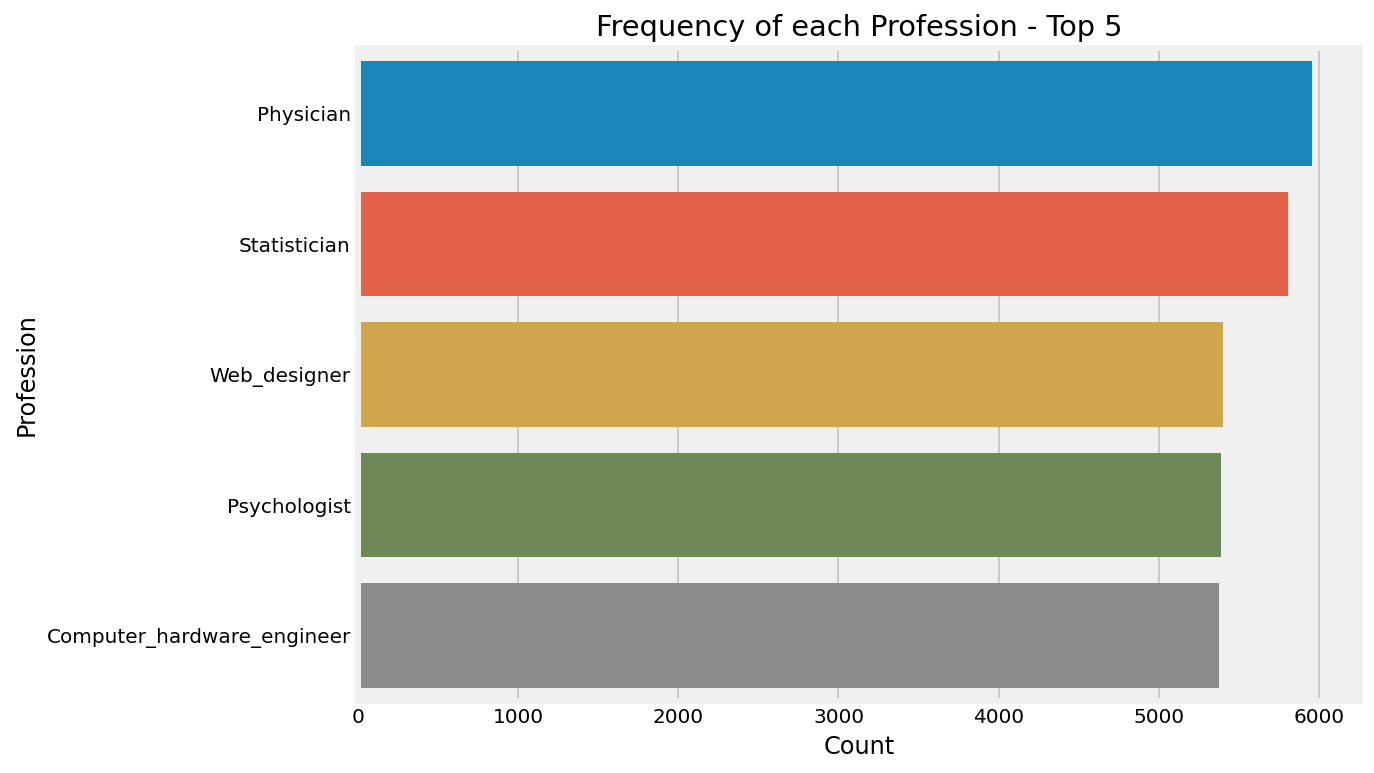

In [20]:
#Plotting the frequencies of each professions - Top 5

plt.figure(figsize=(8,6))
sns.countplot(y=df['Profession'],order = df['Profession'].value_counts().iloc[:5].index)
plt.title("Frequency of each Profession - Top 5")
plt.ylabel("Profession")
plt.xlabel("Count")
plt.show()

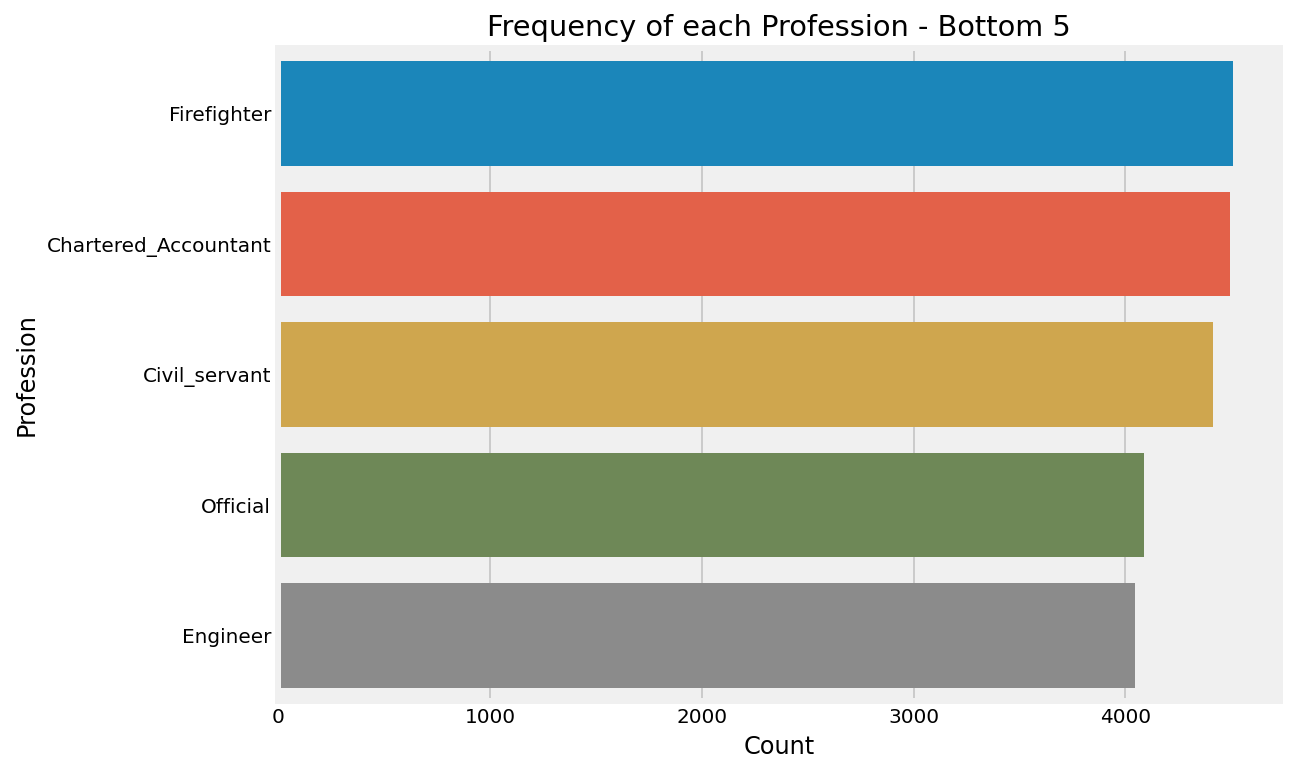

In [21]:
#Plotting the frequencies of each professions - Bottom 5

plt.figure(figsize=(8,6))
sns.countplot(y=df['Profession'],order = df['Profession'].value_counts().iloc[-5:].index)
plt.title("Frequency of each Profession - Bottom 5")
plt.ylabel("Profession")
plt.xlabel("Count")
plt.show()

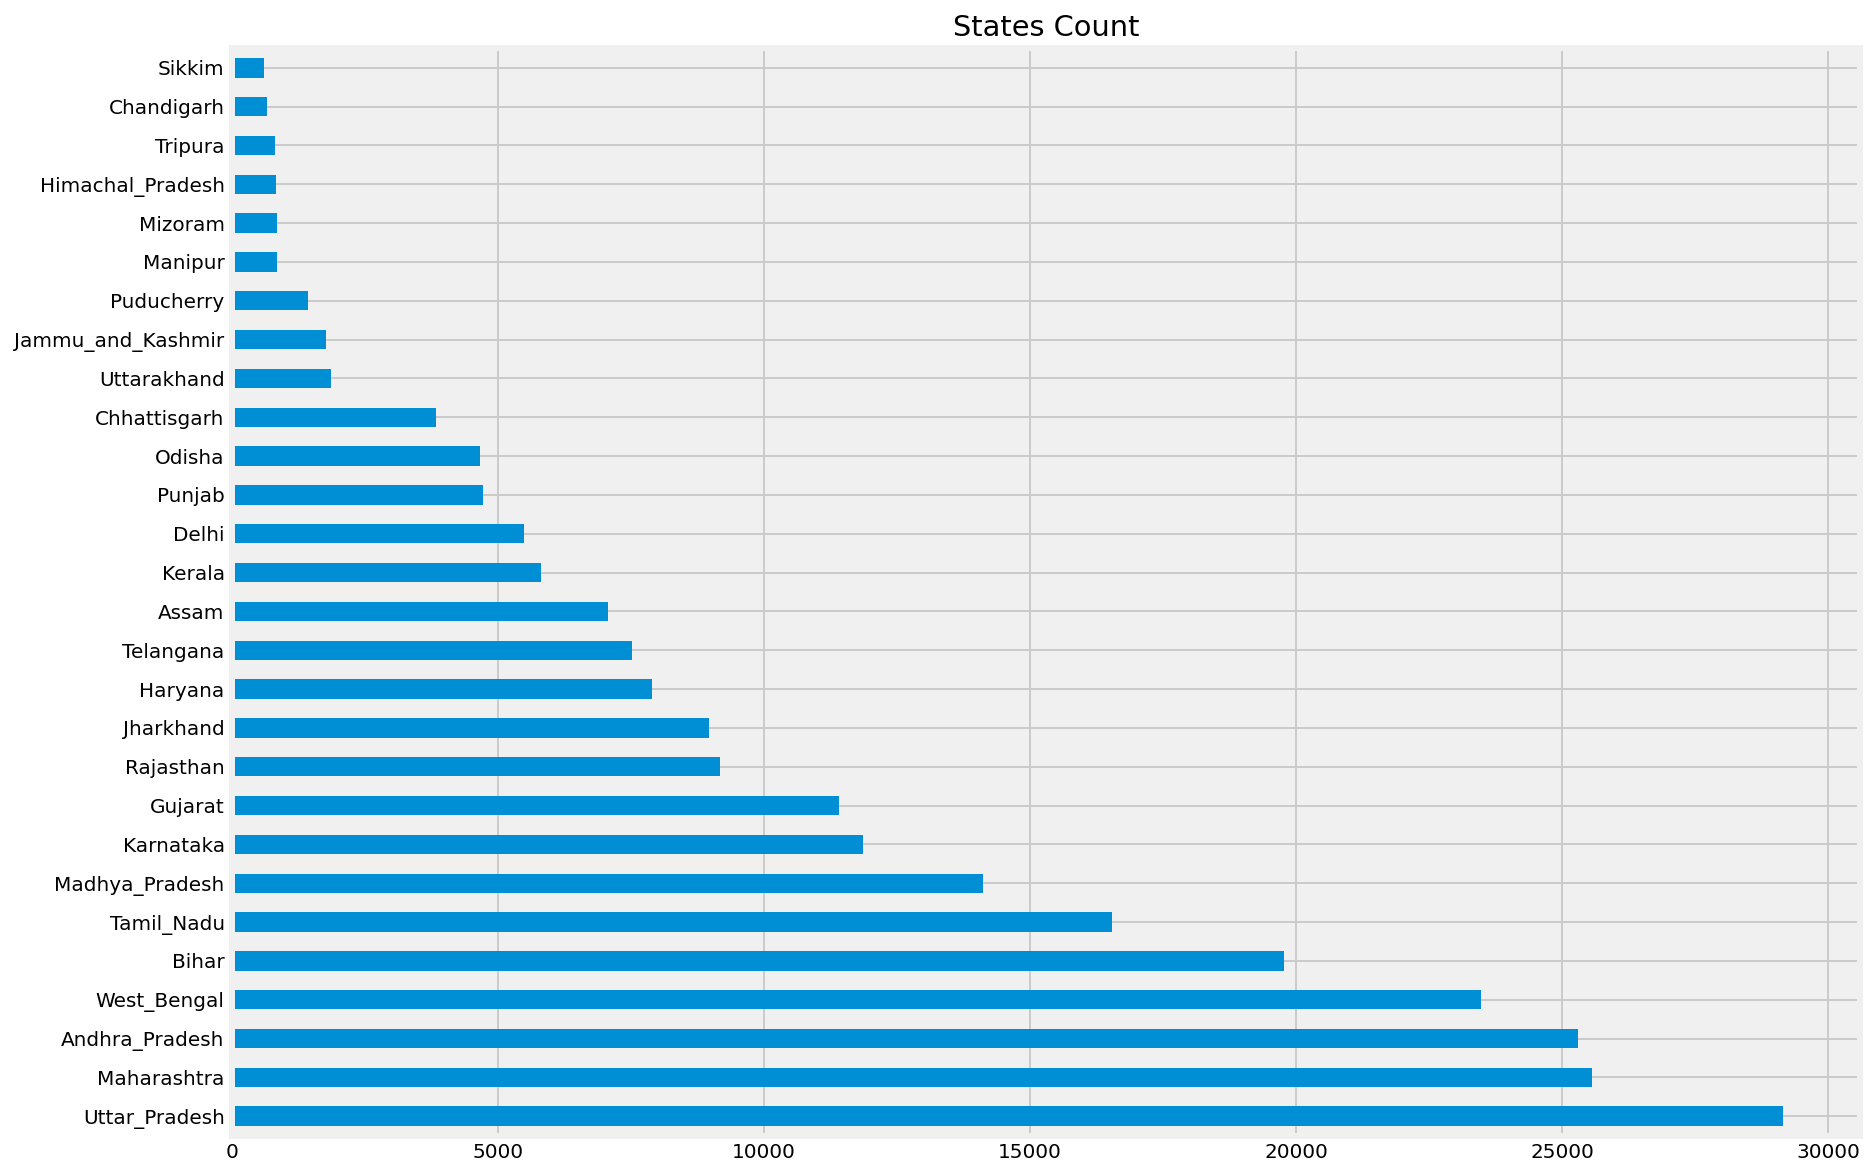

In [22]:
# States count

plt.figure(figsize=(13,10))
df['STATE'].value_counts().plot(kind='barh')
plt.title("States Count")
plt.show()

In [23]:
# Dropping City

df.drop(['CITY'],axis=1,inplace=True)
df.head()

Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0  1303834   23           3         single          rented            no   
1  7574516   40          10         single          rented            no   
2  3991815   66           4        married          rented            no   
3  6256451   41           2         single          rented           yes   
4  5768871   47          11         single          rented            no   

            Profession           STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0  Mechanical_engineer  Madhya_Pradesh                3                 13   
1   Software_Developer     Maharashtra                9                 13   
2     Technical_writer          Kerala                4                 10   
3   Software_Developer          Odisha                2                 12   
4        Civil_servant      Tamil_Nadu                3                 14   

   Risk_Flag  
0          0  
1          0  
2          0  
3          1  
4          1

In [24]:
# Label Encoding

cols_to_encode = ['Married/Single','House_Ownership', 'Car_Ownership', 'Profession', 'STATE']
for item in cols_to_encode:
    df[item] = df[item].astype('category')
    df[item]=df[item].cat.codes
df

Income  Age  Experience  Married/Single  House_Ownership  \
0       1303834   23           3               1                2   
1       7574516   40          10               1                2   
2       3991815   66           4               0                2   
3       6256451   41           2               1                2   
4       5768871   47          11               1                2   
...         ...  ...         ...             ...              ...   
251995  8154883   43          13               1                2   
251996  2843572   26          10               1                2   
251997  4522448   46           7               1                2   
251998  6507128   45           0               1                2   
251999  9070230   70          17               1                2   

        Car_Ownership  Profession  STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0                   0          33     13                3                 13   
1                   0          43     14                9                 13   
2                   0          47     12                4                 10   
3                   1          43     17                2                 12   
4                   0          11     22                3                 14   
...               ...         ...    ...              ...                ...   
251995              0          45     27                6                 11   
251996              0           3     13                6                 11   
251997              0          17     14                7                 12   
251998              0          27     18                0                 10   
251999              0          44     22                7                 11   

        Risk_Flag  
0               0  
1               0  
2               0  
3               1  
4               1  
...           ...  
251995          0  
251996          0  
251997          0  
251998          0  
251999          0  

[252000 rows x 11 columns]

In [25]:
#Feature Scaling

scaler = MinMaxScaler()
scaled = scaler.fit(df.drop('Risk_Flag',axis=1))

In [26]:
dump(scaled, 'scaler_risk.joblib')

['scaler_risk.joblib']

In [27]:
scaled=scaler.transform(df.drop('Risk_Flag',axis=1))

In [28]:
i = 0
for col in df.columns[:-1]:
    df[col] = scaled[:,i]
    i += 1
df.head()

Income       Age  Experience  Married/Single  House_Ownership  \
0  0.129487  0.034483        0.15             1.0              1.0   
1  0.757206  0.327586        0.50             1.0              1.0   
2  0.398564  0.775862        0.20             0.0              1.0   
3  0.625263  0.344828        0.10             1.0              1.0   
4  0.576454  0.448276        0.55             1.0              1.0   

   Car_Ownership  Profession     STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0            0.0        0.66  0.481481         0.214286               0.75   
1            0.0        0.86  0.518519         0.642857               0.75   
2            0.0        0.94  0.444444         0.285714               0.00   
3            1.0        0.86  0.629630         0.142857               0.50   
4            0.0        0.22  0.814815         0.214286               1.00   

   Risk_Flag  
0          0  
1          0  
2          0  
3          1  
4          1

In [29]:
df.describe().T

count      mean       std  min       25%       50%  \
Income             252000.0  0.499198  0.288130  0.0  0.249529  0.499557   
Age                252000.0  0.499208  0.294204  0.0  0.241379  0.500000   
Experience         252000.0  0.504222  0.300129  0.0  0.250000  0.500000   
Married/Single     252000.0  0.897905  0.302774  0.0  1.000000  1.000000   
House_Ownership    252000.0  0.945861  0.195940  0.0  1.000000  1.000000   
Car_Ownership      252000.0  0.301587  0.458948  0.0  0.000000  0.000000   
Profession         252000.0  0.505535  0.294571  0.0  0.260000  0.520000   
STATE              252000.0  0.507607  0.341505  0.0  0.222222  0.518519   
CURRENT_JOB_YRS    252000.0  0.452420  0.260504  0.0  0.214286  0.428571   
CURRENT_HOUSE_YRS  252000.0  0.499448  0.349759  0.0  0.250000  0.500000   
Risk_Flag          252000.0  0.123000  0.328438  0.0  0.000000  0.000000   

                        75%  max  
Income             0.747495  1.0  
Age                0.758621  1.0  
Experience         0.750000  1.0  
Married/Single     1.000000  1.0  
House_Ownership    1.000000  1.0  
Car_Ownership      1.000000  1.0  
Profession         0.760000  1.0  
STATE              0.814815  1.0  
CURRENT_JOB_YRS    0.642857  1.0  
CURRENT_HOUSE_YRS  0.750000  1.0  
Risk_Flag          0.000000  1.0

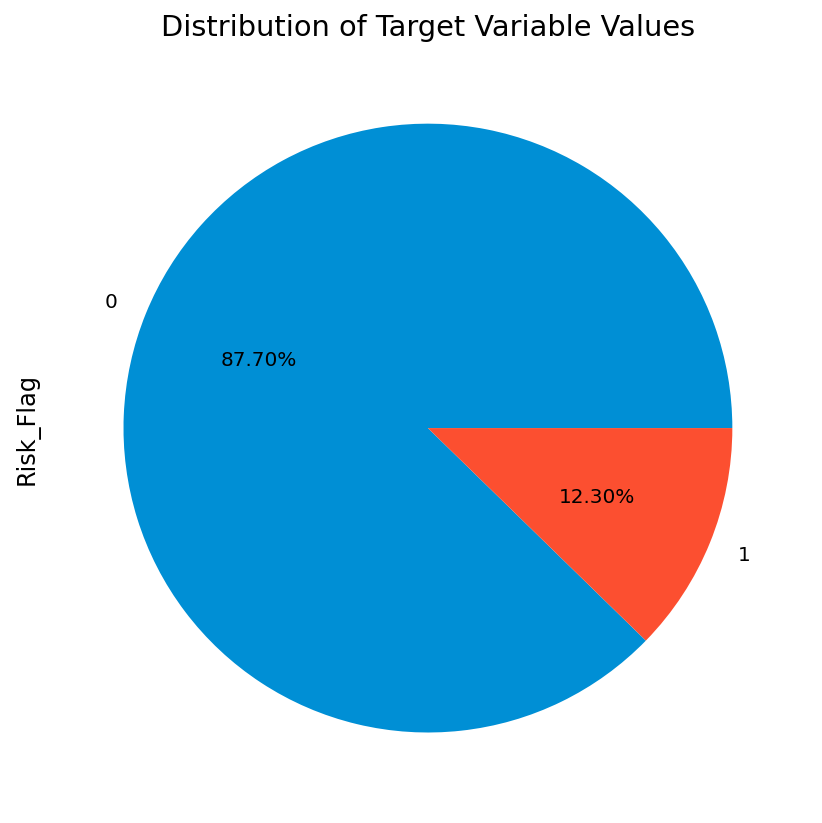

In [31]:
#Risk Flag Ratio
plt.figure(figsize=(7,7))
plt.title("Distribution of Target Variable Values")
df['Risk_Flag'].value_counts().plot(kind='pie', autopct="%.2f%%")
plt.show()

In [32]:
# Looking at the balance of the target variable

df['Risk_Flag'].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

Target is imbalanced. So, we need to balance it with undersampling.

In [33]:
# Under Sampling

class0 = df[df['Risk_Flag'] == 0].sample(30996)
class0.shape

(30996, 11)

In [34]:
class1 = df[df['Risk_Flag'] == 1]
class1.shape

(30996, 11)

In [35]:
df2 = pd.concat([class0,class1], axis=0) 
df2.shape

(61992, 11)

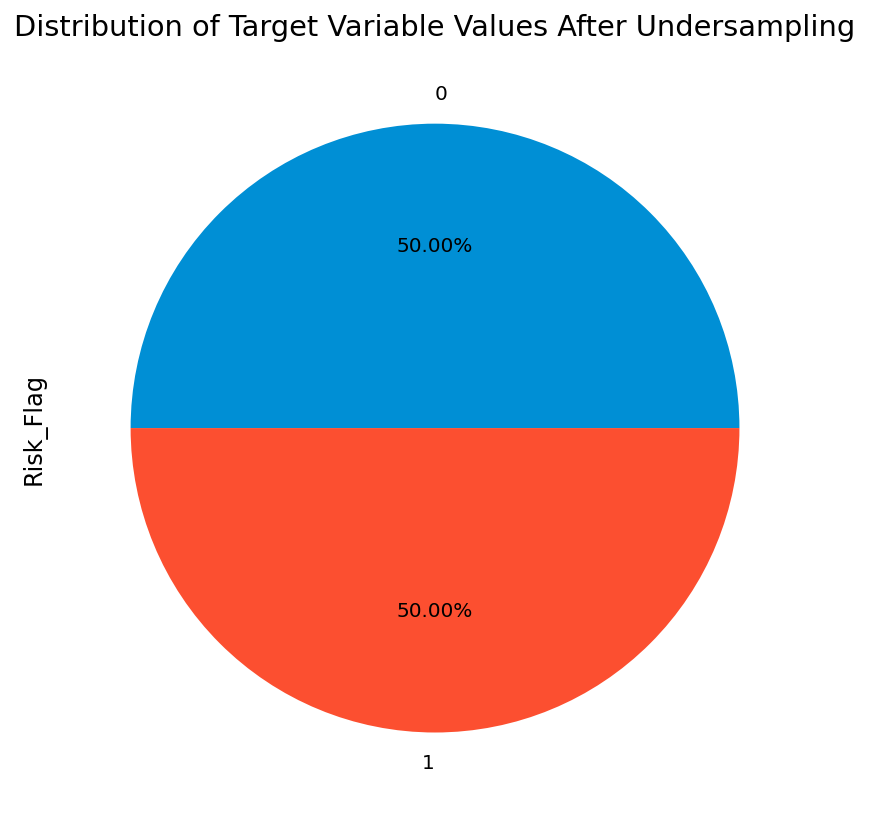

In [36]:
plt.figure(figsize=(7,7))
plt.title("Distribution of Target Variable Values After Undersampling")
df2['Risk_Flag'].value_counts().plot(kind='pie', autopct="%.2f%%")
plt.show()

Now, it became a balanced target.


In [37]:
x, y = df2.drop('Risk_Flag',axis=1),df2['Risk_Flag']
x.shape, y.shape

((61992, 10), (61992,))

In [38]:
#Splitting for test-train sets

X_train, X_test, Y_train, Y_test = train_test_split(x,y,random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((46494, 10), (15498, 10), (46494,), (15498,))

              precision    recall  f1-score   support

           0       0.54      0.52      0.53     23306
           1       0.54      0.56      0.55     23188

    accuracy                           0.54     46494
   macro avg       0.54      0.54      0.54     46494
weighted avg       0.54      0.54      0.54     46494



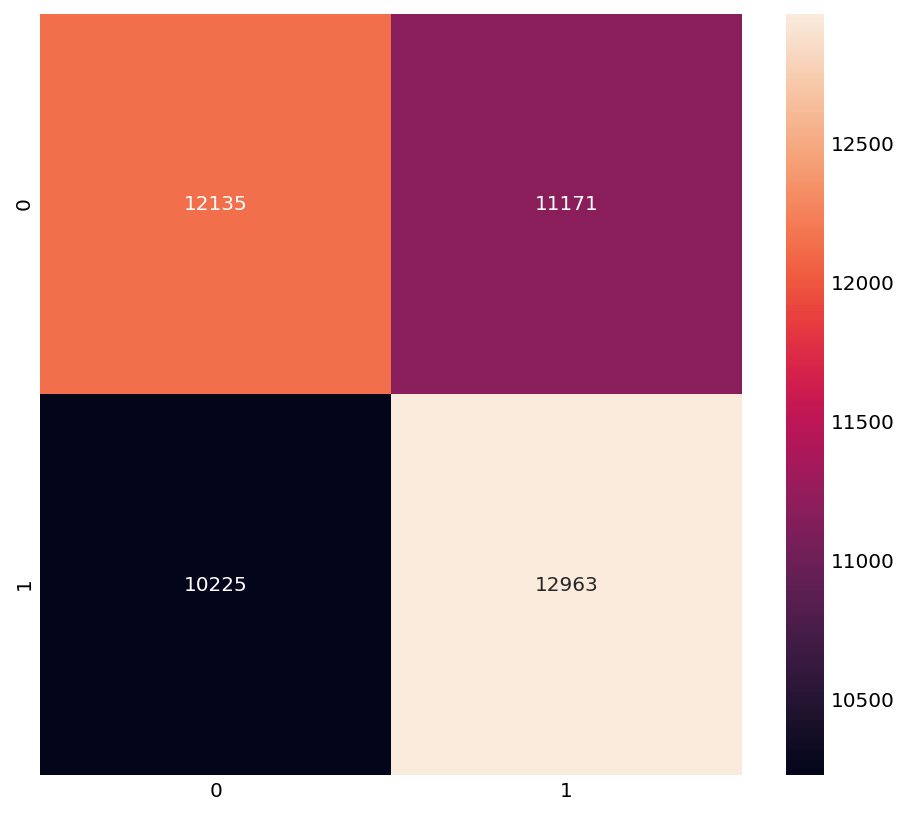

In [42]:
#Models

#1) Logistic Regression

lr = LogisticRegression(random_state=0).fit(X_train, Y_train)

y_train_pred = lr.predict(X_train)

def plot_actual_vs_predicted(y_true,y_pred,title=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm, annot=True, fmt='g')
plot_actual_vs_predicted(Y_train, y_train_pred, 'Train Data Predictions')
print(classification_report(Y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.52      0.51      0.51      7690
           1       0.53      0.55      0.54      7808

    accuracy                           0.53     15498
   macro avg       0.53      0.53      0.53     15498
weighted avg       0.53      0.53      0.53     15498



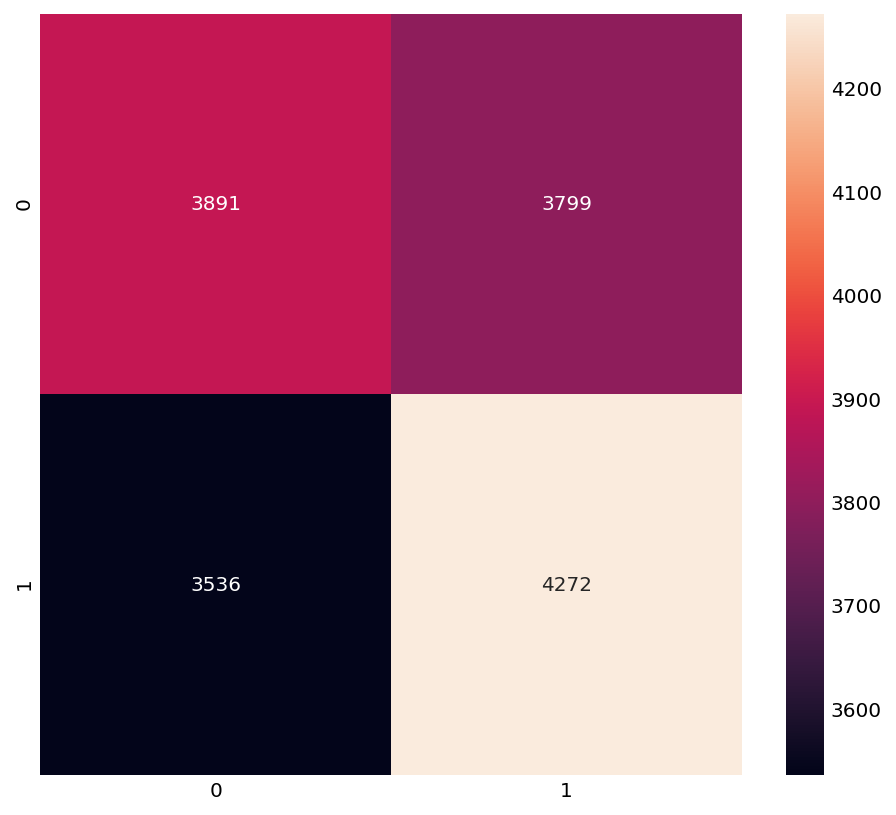

In [43]:
#Test results

y_test_pred = lr.predict(X_test)
plot_actual_vs_predicted(Y_test, y_test_pred, 'Test Data Predictions')
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     23306
           1       0.93      1.00      0.96     23188

    accuracy                           0.96     46494
   macro avg       0.96      0.96      0.96     46494
weighted avg       0.96      0.96      0.96     46494



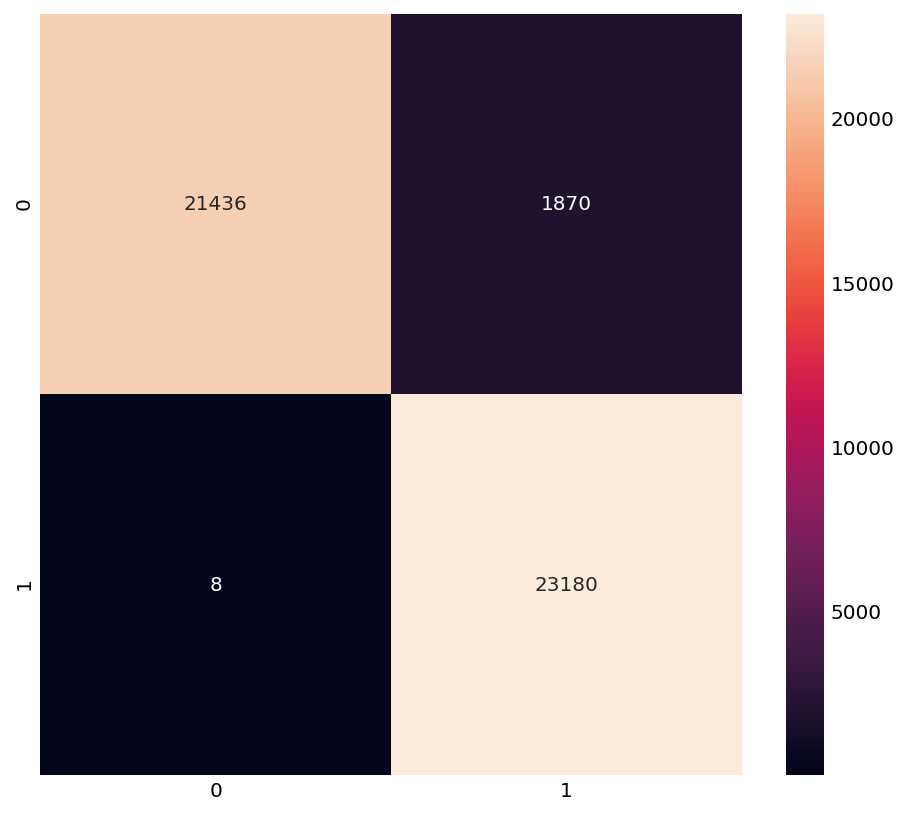

In [44]:
#2) Random Forest Classifier

rf = RandomForestClassifier().fit(X_train, Y_train)

y_train_pred = rf.predict(X_train)

plot_actual_vs_predicted(Y_train, y_train_pred, 'Train Data Predictions')
print(classification_report(Y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.82      0.89      0.85      7690
           1       0.88      0.81      0.84      7808

    accuracy                           0.85     15498
   macro avg       0.85      0.85      0.85     15498
weighted avg       0.85      0.85      0.85     15498



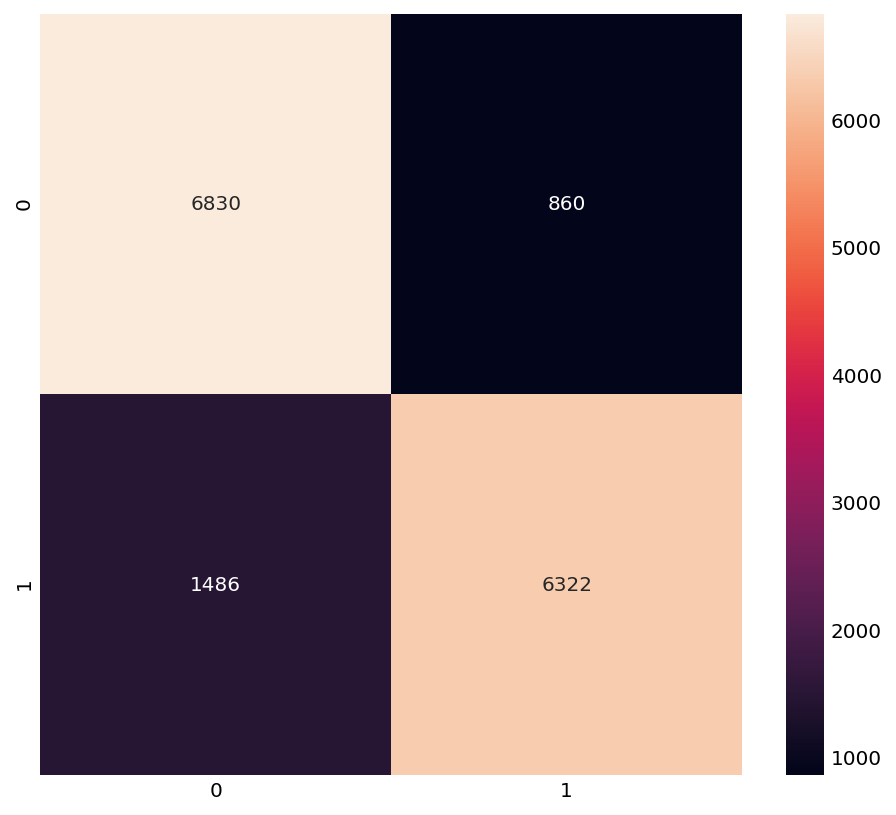

In [45]:
#Test results

y_test_pred = rf.predict(X_test)
plot_actual_vs_predicted(Y_test, y_test_pred, 'Test Data Predictions')
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     23306
           1       0.89      0.88      0.88     23188

    accuracy                           0.88     46494
   macro avg       0.88      0.88      0.88     46494
weighted avg       0.88      0.88      0.88     46494



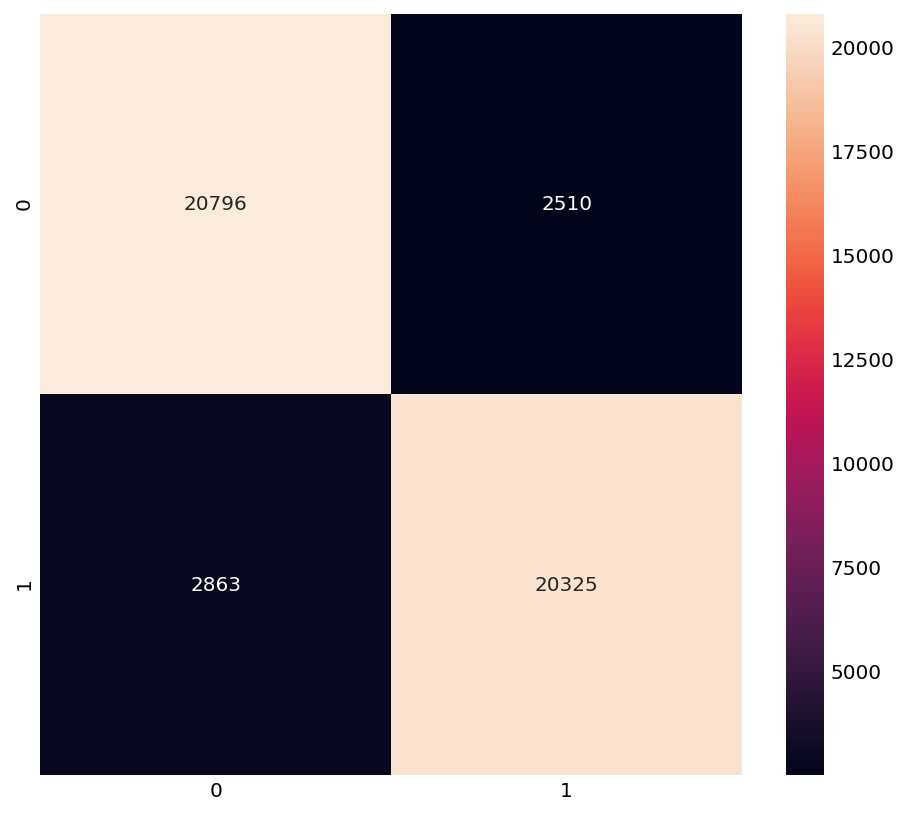

In [46]:
#3) Nearest Neighbors Classifier

nn = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)

y_train_pred = nn.predict(X_train)

plot_actual_vs_predicted(Y_train, y_train_pred, 'Train Data Predictions')
print(classification_report(Y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84      7690
           1       0.85      0.82      0.84      7808

    accuracy                           0.84     15498
   macro avg       0.84      0.84      0.84     15498
weighted avg       0.84      0.84      0.84     15498



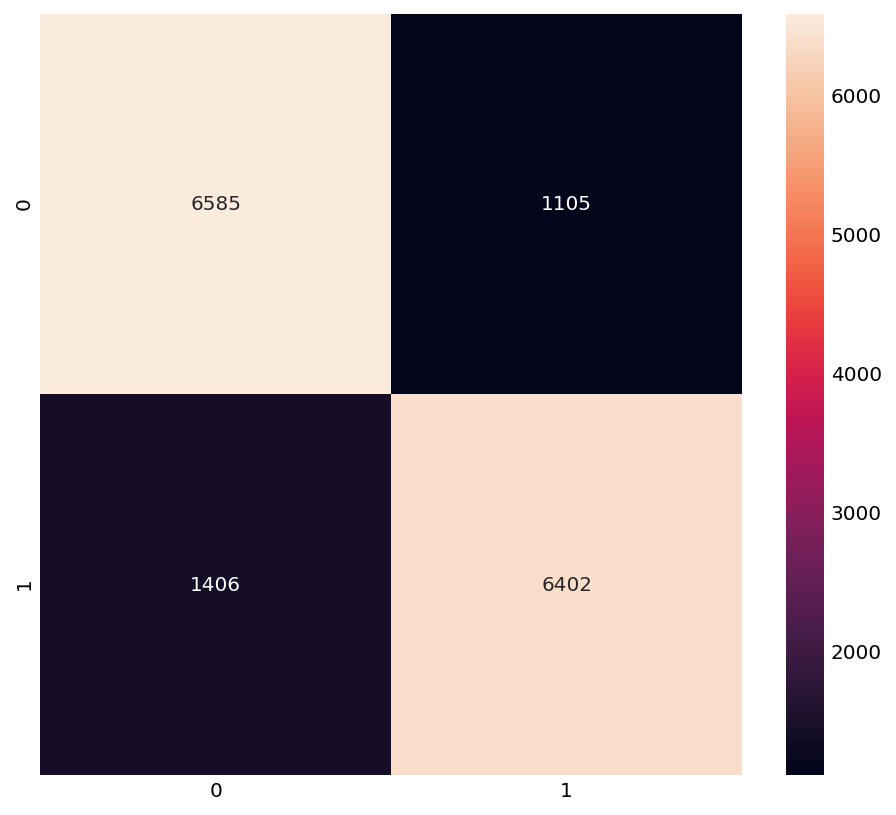

In [47]:
#Test results

y_test_pred = nn.predict(X_test)
plot_actual_vs_predicted(Y_test, y_test_pred, 'Test Data Predictions')
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.56      0.31      0.40     23306
           1       0.52      0.76      0.62     23188

    accuracy                           0.53     46494
   macro avg       0.54      0.53      0.51     46494
weighted avg       0.54      0.53      0.51     46494



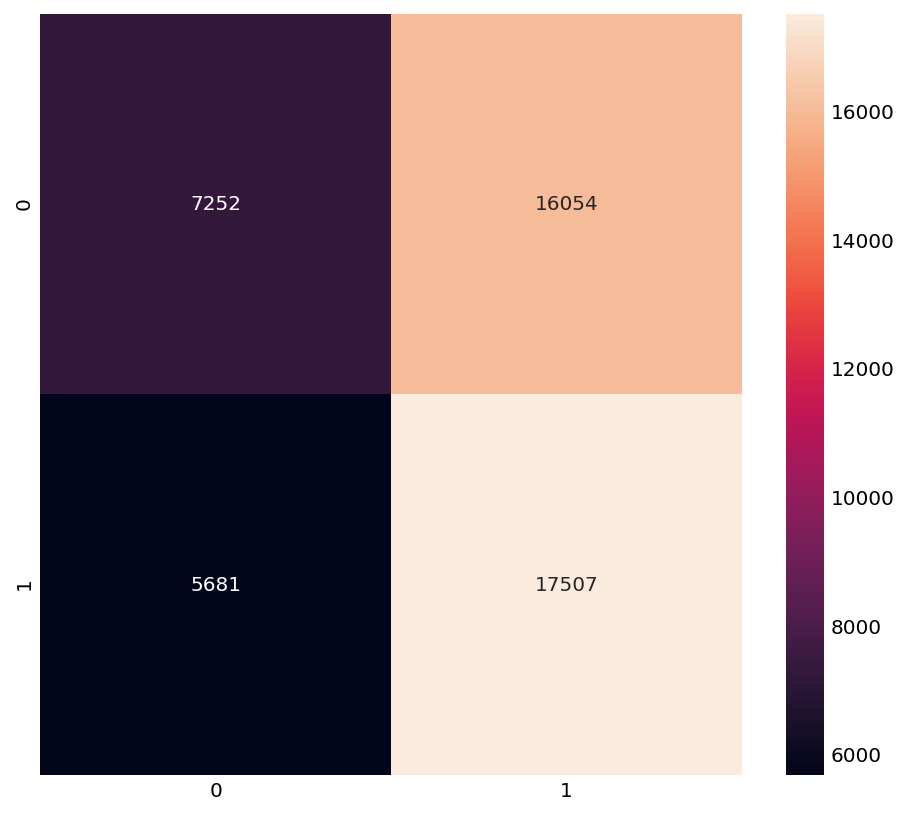

In [48]:
#4) Naive Bayes Classifier

nb = GaussianNB().fit(X_train, Y_train)

y_train_pred = nb.predict(X_train)
plot_actual_vs_predicted(Y_train, y_train_pred, 'Train Data Predictions')
print(classification_report(Y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.55      0.31      0.40      7690
           1       0.53      0.75      0.62      7808

    accuracy                           0.53     15498
   macro avg       0.54      0.53      0.51     15498
weighted avg       0.54      0.53      0.51     15498



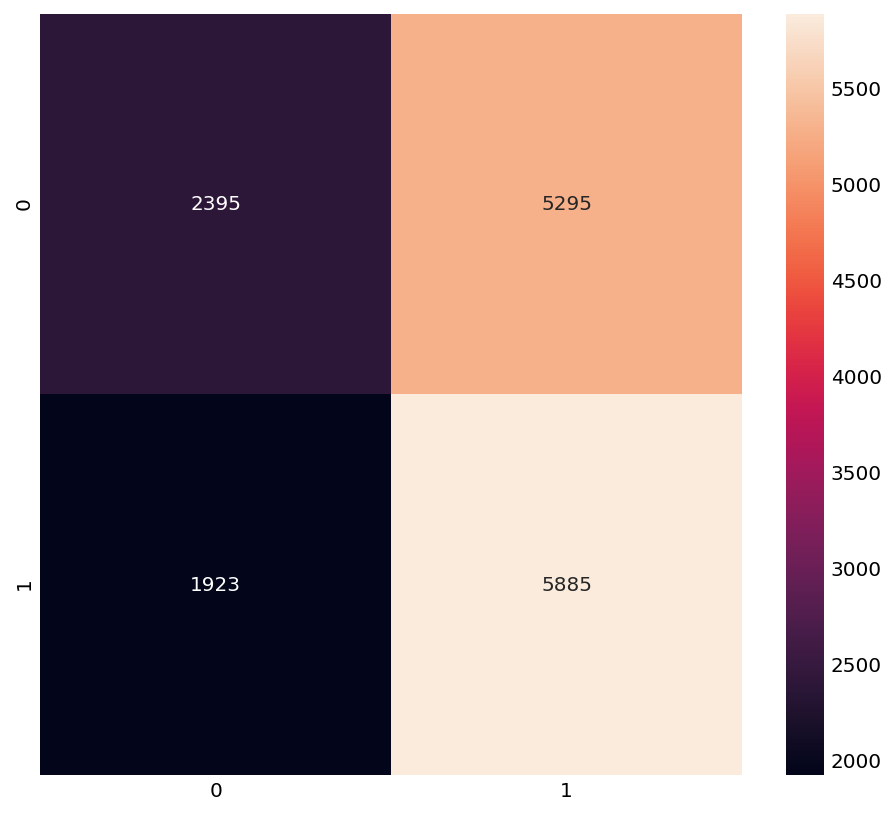

In [49]:
#Test results

y_test_pred = nb.predict(X_test)
plot_actual_vs_predicted(Y_test, y_test_pred, 'Test Data Predictions')
print(classification_report(Y_test, y_test_pred))

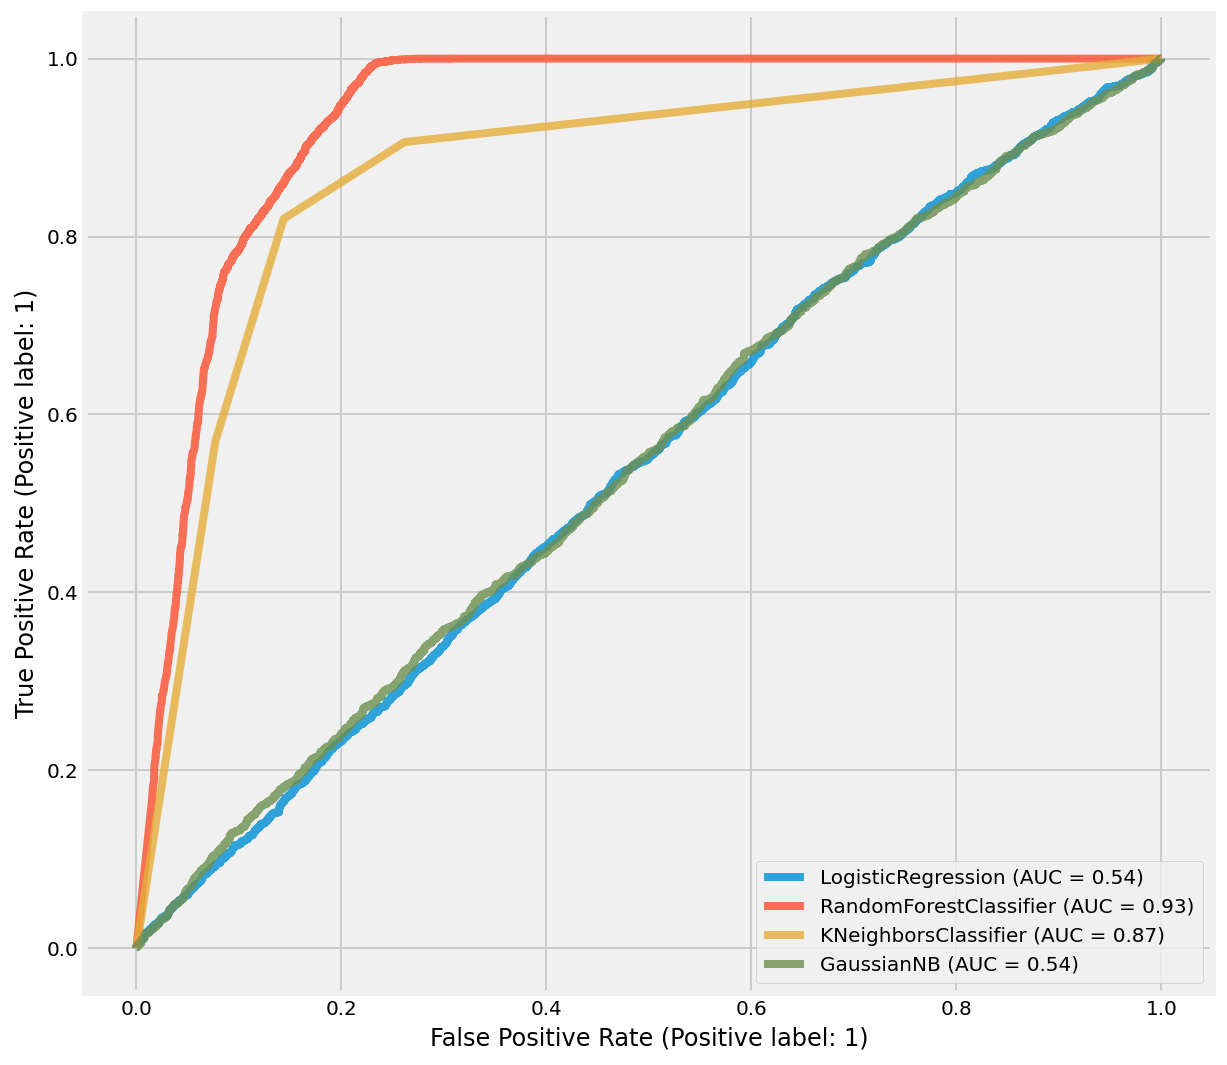

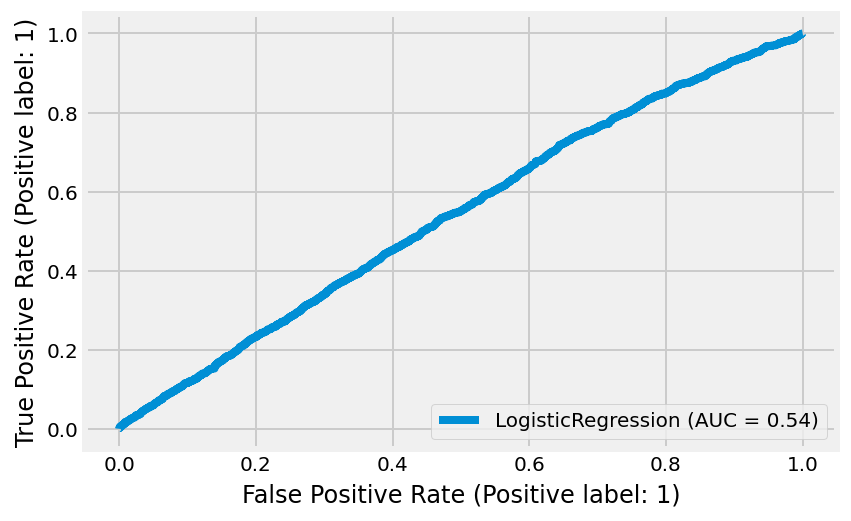

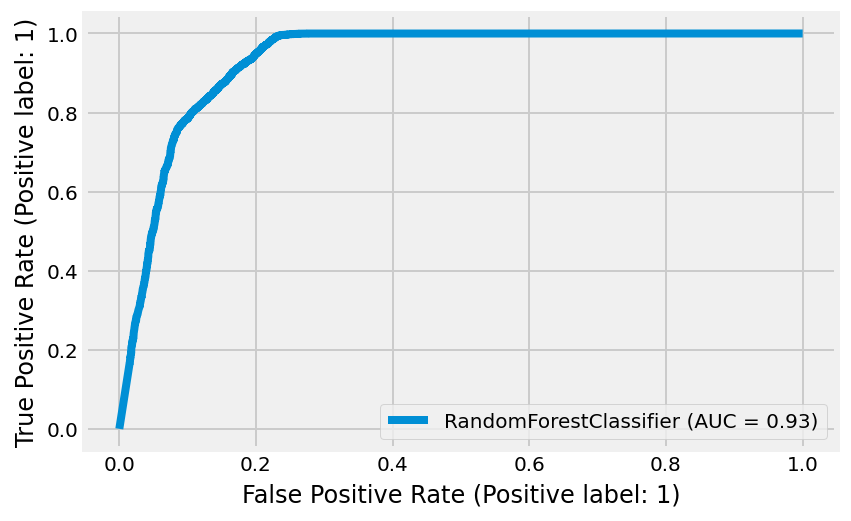

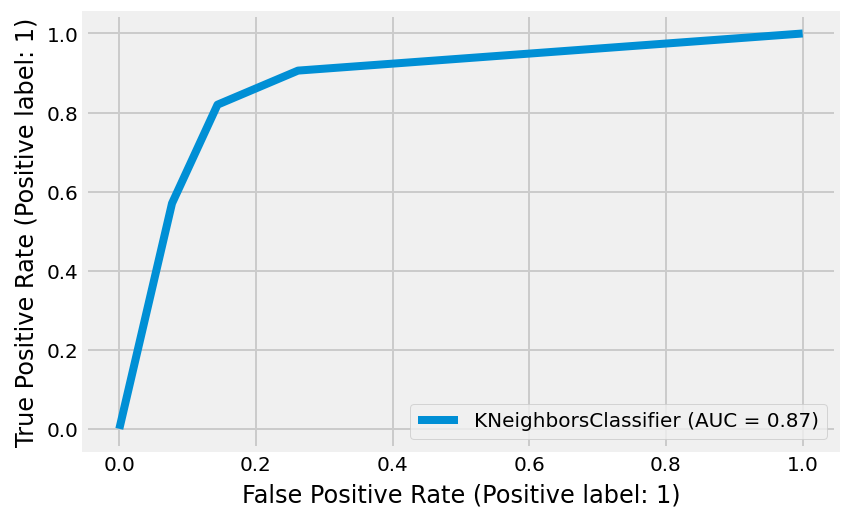

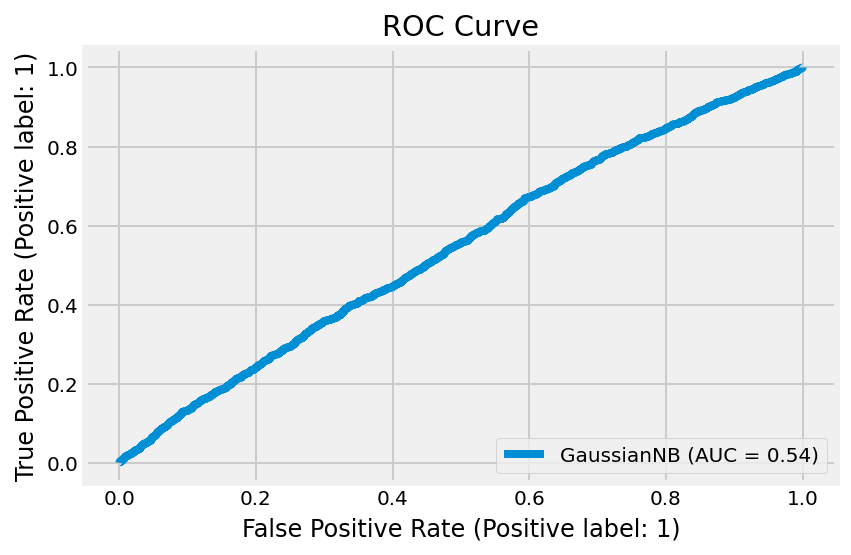

In [50]:
#ROC Curves for deciding which model we are going to use

plt.figure(figsize=(9,9))
ax = plt.gca()


plot_roc_curve(lr, X_test, Y_test).plot(ax=ax, alpha=0.8)
plot_roc_curve(rf, X_test, Y_test).plot(ax=ax, alpha=0.8)
plot_roc_curve(nn, X_test, Y_test).plot(ax=ax, alpha=0.8)
plot_roc_curve(nb, X_test, Y_test).plot(ax=ax, alpha=0.8)
plt.title("ROC Curve")
plt.show()

We are going to use Random Forest Classifier model since it has the highest AUC score.

In [51]:
#Dumping the random forest classifier to a pickle file

with open('model_pickle','wb') as f:
    pickle.dump(rf,f)